In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read the Dataset

In [2]:
df=pd.read_csv("cancer.csv")

# info of the dataset

In [3]:
df.shape

(569, 33)

In [4]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

# getting top 10 variables

In [6]:
df.head(20)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


# checking missing null values

<Axes: >

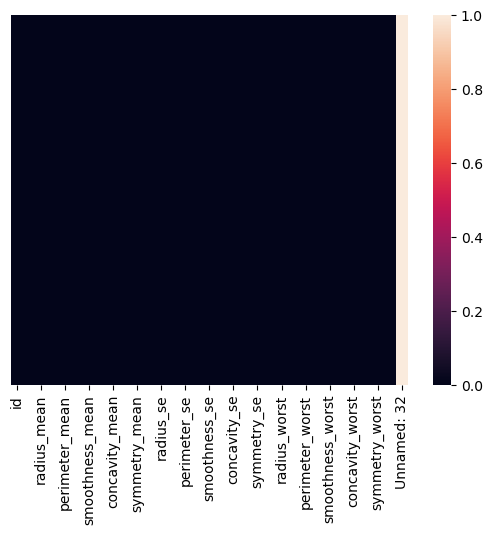

In [7]:
sns.heatmap(df.isnull(), yticklabels = False)

In [8]:
# observation
#1.In this heat map observation we see the unnamed 32 feature has above 80% of null values.
#2.The other features does not have null values.
#3.we can check the unnamed 32 is correlated or not.
#4.If it is not we remove that feature.


In [9]:
# drop all the missing values
df=df.dropna(axis=1)

<Axes: >

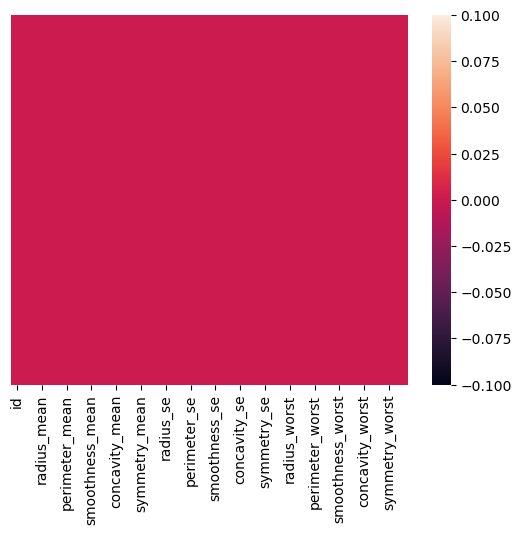

In [10]:
# after removing the missing values
sns.heatmap(df.isnull(), yticklabels = False)

In [11]:
# observation:
# There is no missing values now.
# we use dropna to remove the missing values

In [4]:
# after removing the null values
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [12]:
#new shape
df.shape

(569, 32)

In [13]:
# The 33 features is reduced to 32 after removing the missing values because there is one feature full of missing values
# so it reduced to 32

In [14]:
# Target feature
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

<Axes: xlabel='diagnosis', ylabel='count'>

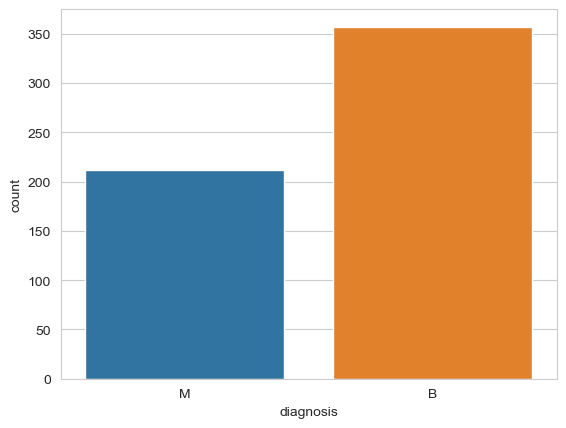

In [15]:
#visualiztion of target feature
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df)

In [16]:
# observation
#1.Here B means 'Benign' and M means 'Malignant'.
# 2. The  B means there is no cancer and M means Patient has the cancer.
#3. From this plot we see the count of cancer patient is range of 200-230.
#4. count of not having cancer patient is range of 350.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [18]:
# observation
# we have one object data type we want to change it into int type.
# The target variable is in Object type

In [19]:
# changing categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["diagnosis"]=le.fit_transform(df["diagnosis"])


In [20]:
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<Axes: xlabel='diagnosis', ylabel='count'>

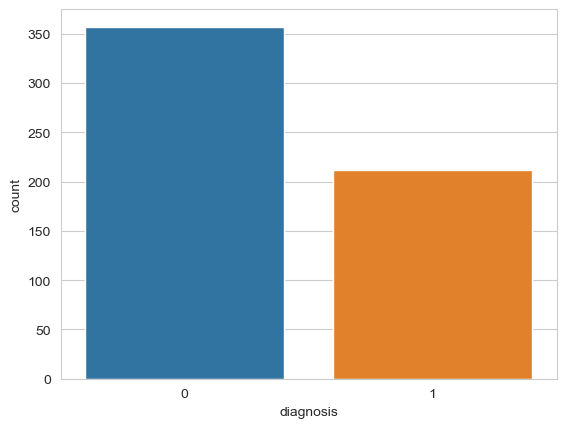

In [21]:
#  visaulization of changed target feature
sns.set_style('whitegrid')
sns.countplot(x='diagnosis',data=df)

In [22]:
# observation
# Here M is 1 and B is 0
# The plot shows the no of cancer patients are above 350.
# The not affected cancer patients are range between 200 to 230


In [23]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


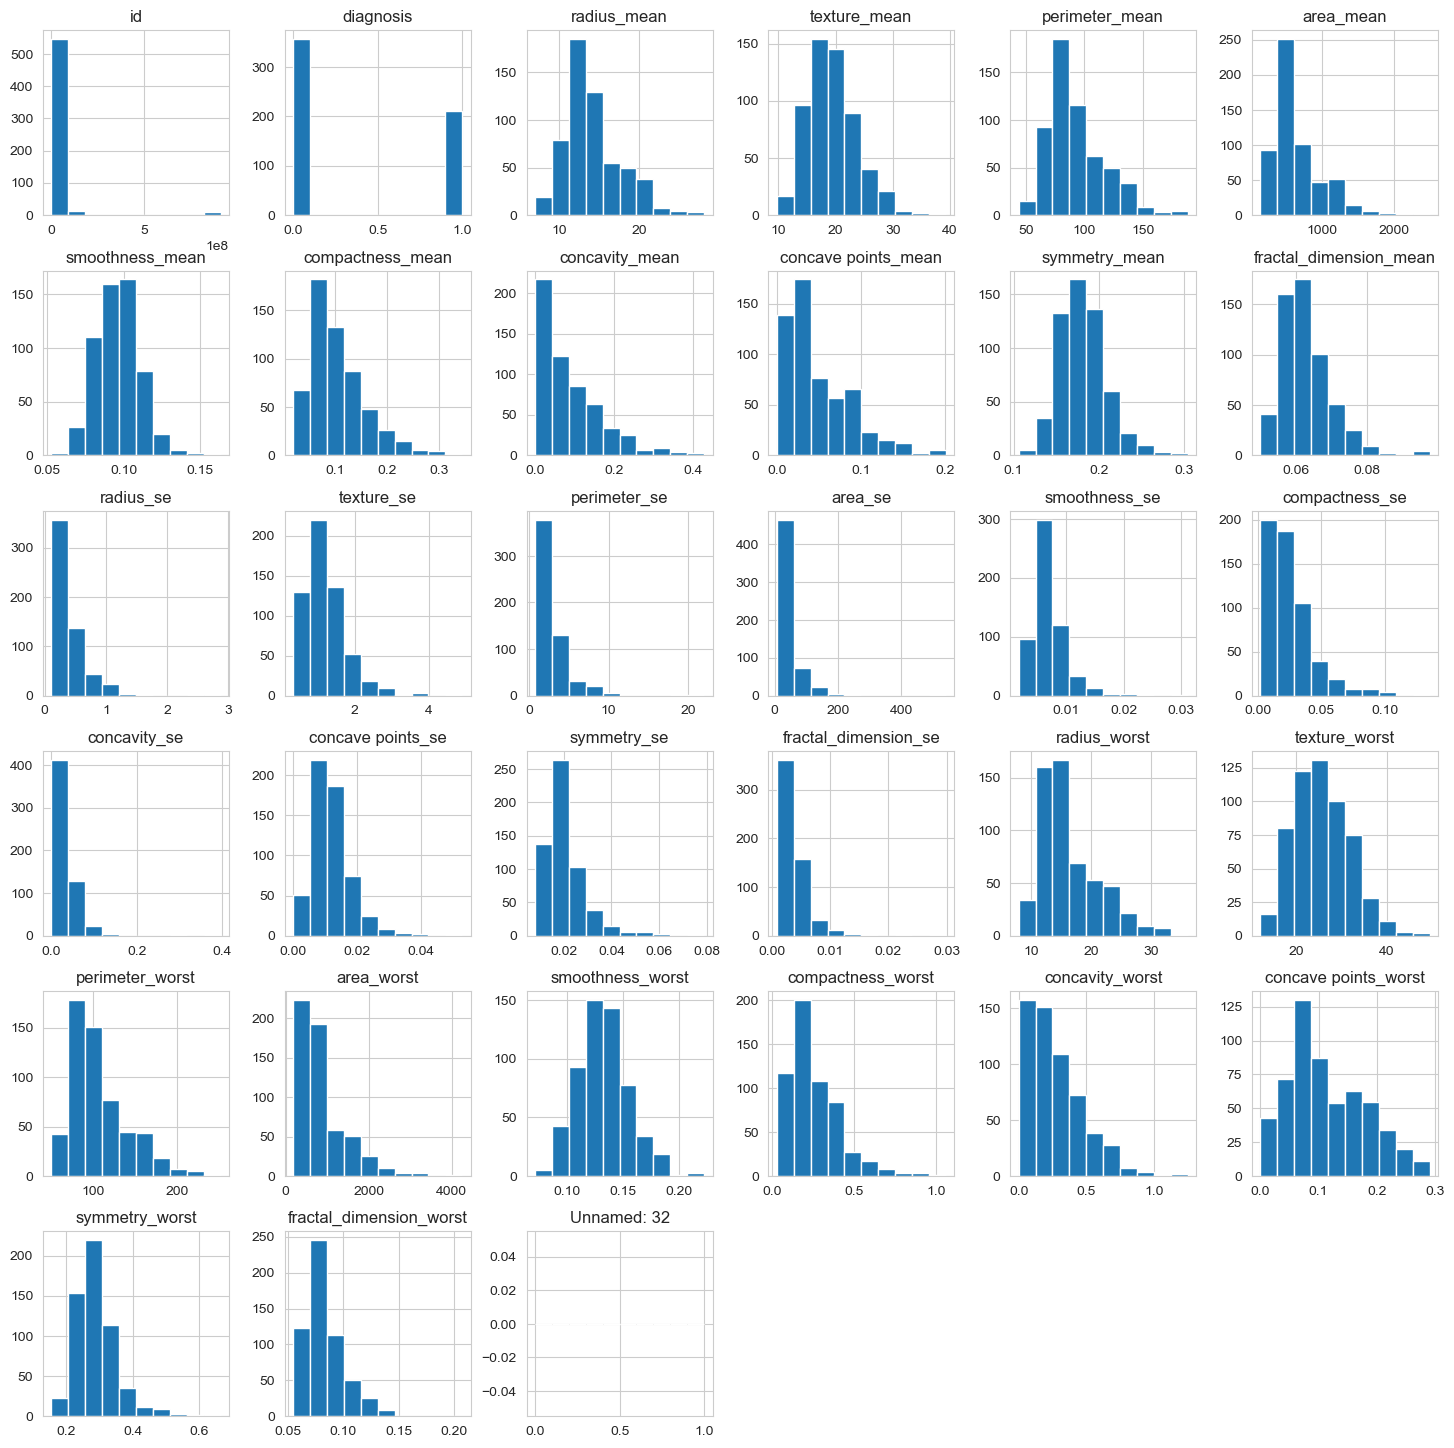

In [17]:
#PDF's of Features
fig=df.hist(figsize= (18,18))

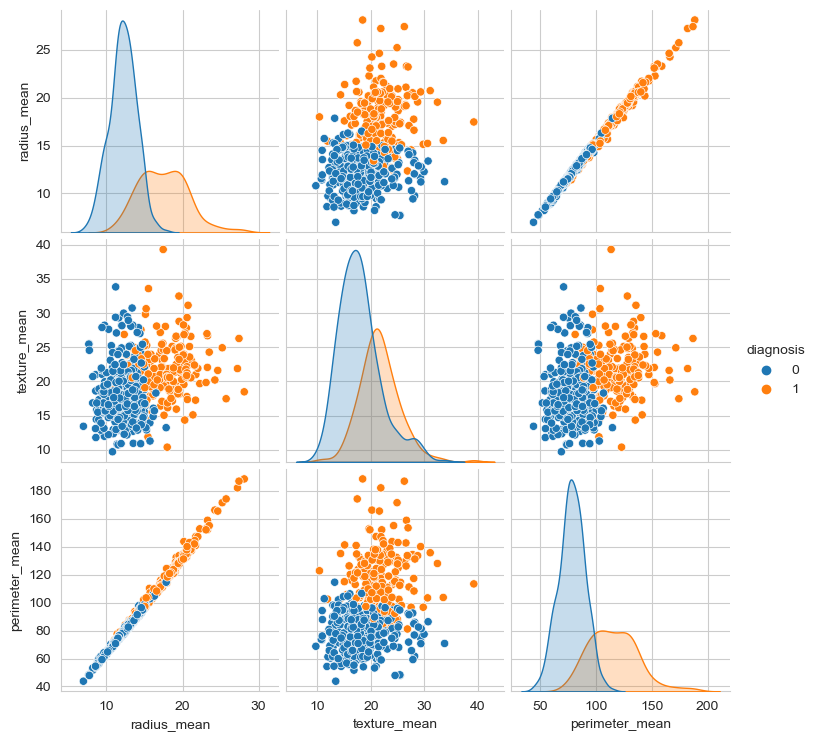

In [24]:
#pair plot
sns.pairplot(df.iloc[:,1:5],hue='diagnosis')


In [ ]:
# observation:
# from this pair plot we see the relationship between the features.
# In this plot we see relationship for the each features with target data

In [25]:
# correlation
df.iloc[:,1:12].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,-0.012838
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921


In [ ]:
df.head(5)

<Axes: >

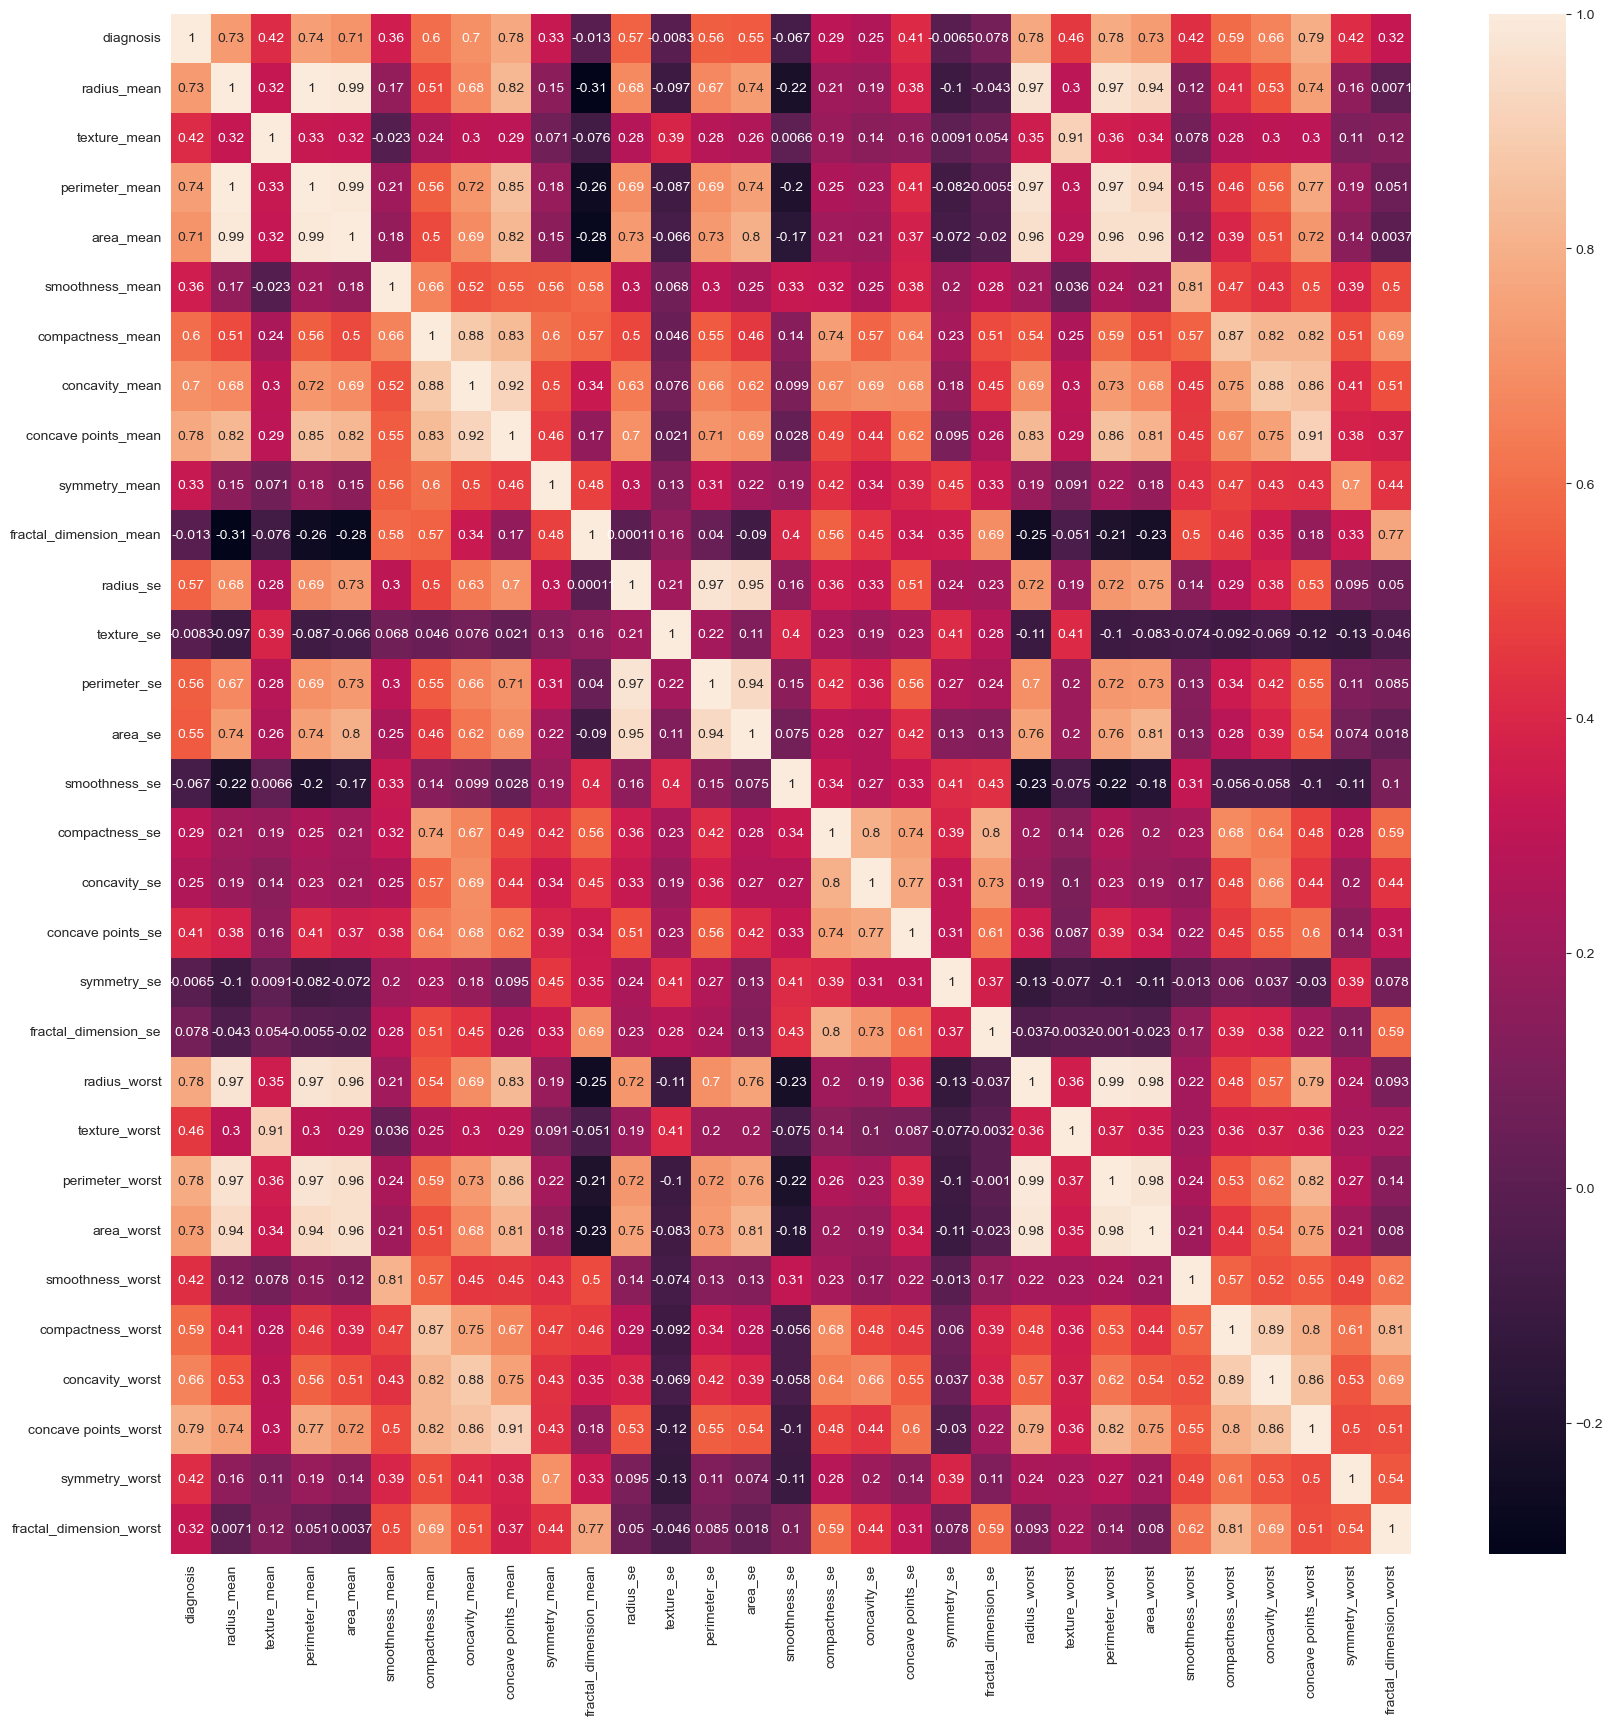

In [46]:
plt.figure(figsize=(20,20))
sns.heatmap(df.iloc[:,1:32].corr(),annot=True)

In [27]:
# Observation
# The correlation is ranges between -1to1.
# 1 means positive correlation
# -1 means negative correlation
# 0 means it is not correlated with feature
# from this plot all features have some correlation
# The dark colour indicates the negative correlation
# the fractal_dimension_mean negatively correalted with radius_mean,area_mean,perimeter_meann

In [28]:
# independent and dependent datasets
X=df.iloc[:,2:31].values
Y=df.iloc[:,1].values  

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)

In [30]:
#observation
# we assign the independent and dependent variable
# X is independent variable and y is the independent variable
# we use train test split for splitting the data
# train data for training the dataset and test for test the dataset
# we use test for spliting the data for train and test
# 70% for train and 30% for test


In [31]:
# scaling the dataset
from sklearn.preprocessing import StandardScaler

In [32]:
se=StandardScaler()
X_train=se.fit_transform(X_train)
X_test=se.fit_transform(X_test)
X_train

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.81232053,
        -0.75798367, -0.01614761],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.37504806,
        -0.60687023,  0.09669004],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.18298917,
        -0.02371948, -0.20050207],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.76769066,
        -0.97974953, -0.71542314],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.34136004,
        -1.75401433, -1.58157125],
       [-0.73694129,  1.14989702, -0.71226578, ...,  0.47893704,
        -0.27460457, -1.25895095]])

In [33]:
# observation
# we use the standard scaler for scaling the dataset with mean=0,std=1
#the standard scalar used to reduce the impact of outliers in the model
# it the features are not scaled properly the model perform poorly so we use standard scaler.

In [61]:
def algorithm(X_train,Y_train):
      from sklearn.ensemble import RandomForestClassifier
      re= RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
      re.fit(X_train,Y_train)
      
      from sklearn.linear_model import LogisticRegression
      log=LogisticRegression(random_state=0)
      log.fit(X_train,Y_train)
        
      from sklearn.tree import DecisionTreeClassifier
      tree=DecisionTreeClassifier(max_depth=6,random_state=0,criterion='entropy')
      tree.fit(X_train,Y_train)
      
      print('[0] Random forest accuracy:',re.score(X_train,Y_train))
      print('[1] Logistic regression accuracy:',log.score(X_train,Y_train))
      print('[2] Decision tree accuracy:',tree.score(X_train,Y_train))
      
      return re, log, tree



In [62]:
model=algorithm(X_train,Y_train)


[0] Random forest accuracy: 0.9978021978021978
[1] Logistic regression accuracy: 0.9912087912087912
[2] Decision tree accuracy: 0.9934065934065934


Confusion matrix 0
[[67  0]
 [ 3 44]]


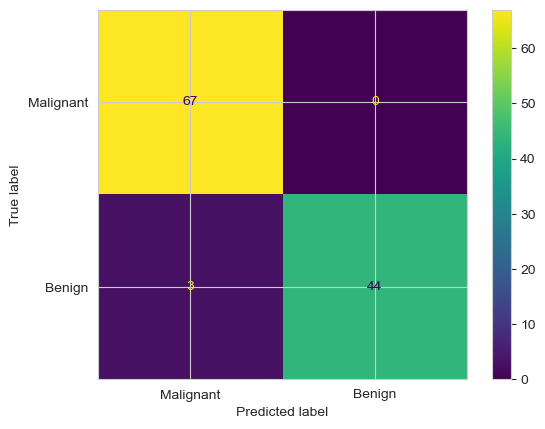

Confusion matrix 1
[[66  1]
 [ 3 44]]


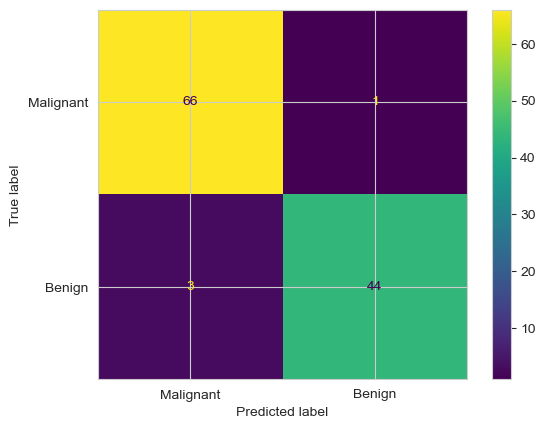

Confusion matrix 2
[[63  4]
 [ 6 41]]


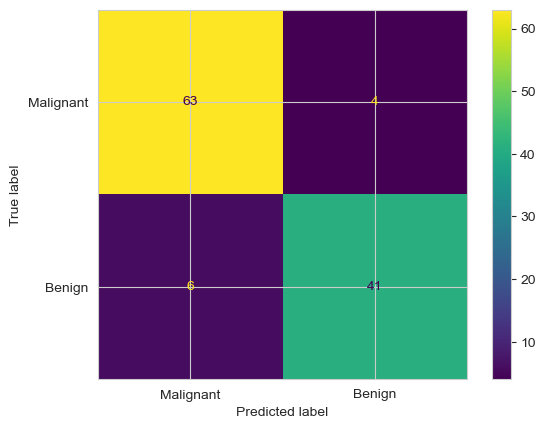

In [63]:
# using confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
for i in range(len(model)):
    print("Confusion matrix",i)
    confusion= confusion_matrix(Y_test,model[i].predict(X_test))
    print(confusion)
    cmap = 'viridis'
    display_labels=['Malignant','Benign']
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=display_labels)
    disp.plot(cmap=cmap)
    plt.show()
     

In [64]:
# confusion matrix for getting the TP,FP,FN,TN
# Here in model[0] TP-67,FP-0,FN-3,TN-44

In [65]:
# observation
# we train the datas with three different models
# we get the accuracy for the three different models

In [66]:
# Testing the Model / Algorithms 

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

for i in range(len(model)):
    
    print('Model',i)
    print(classification_report(Y_test,model[i].predict(X_test)))
    print('Accuracy',accuracy_score(Y_test,model[i].predict(X_test)))
          

Model 0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        67
           1       1.00      0.94      0.97        47

    accuracy                           0.97       114
   macro avg       0.98      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

Accuracy 0.9736842105263158
Model 1
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        67
           1       0.98      0.94      0.96        47

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Accuracy 0.9649122807017544
Model 2
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        67
           1       0.91      0.87      0.89        47

    accuracy                           0.91       114
   macro avg       0.91      0.91      0.91     

In [67]:
# observation
#we get the accuracy for the testing data for three models
# classification report is used to get the accuracy,f1score,precision,recall in classification type.
# In this three models the random forest classifier is working good.

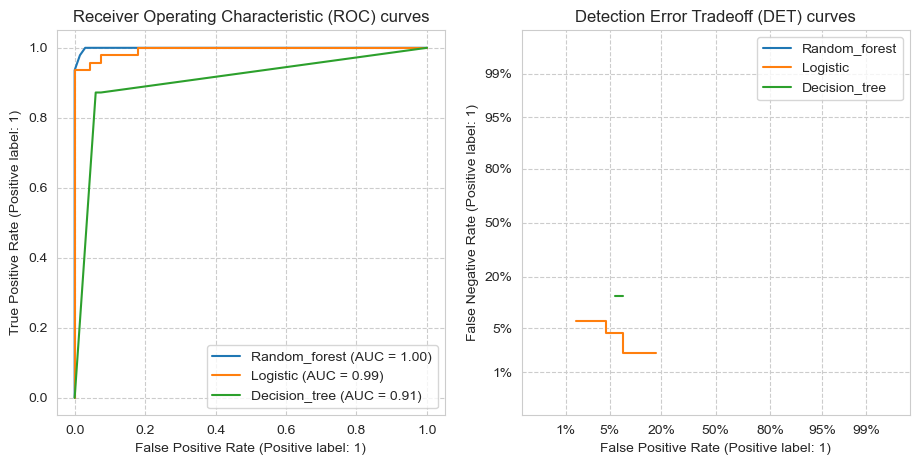

In [70]:
from sklearn.metrics import RocCurveDisplay,DetCurveDisplay

models = {'Random_forest':model[0],'Logistic':model[1],'Decision_tree':model[2]}
fig, [ax_roc, ax_det] = plt.subplots(1, 2, figsize=(11,5))


for name, clf in models.items():
    clf.fit(X_train, Y_train)
    RocCurveDisplay.from_estimator(clf, X_test, Y_test, ax=ax_roc, name=name)
    DetCurveDisplay.from_estimator(clf, X_test, Y_test, ax=ax_det, name=name)
    
ax_roc.set_title("Receiver Operating Characteristic (ROC) curves")
ax_det.set_title("Detection Error Tradeoff (DET) curves")

ax_roc.grid(linestyle="--")
ax_det.grid(linestyle="--")



plt.legend()
plt.show()
     

In [ ]:
#observation
# The DET curve is useful for evaluating the performance of a binary classifier when both the FNR and FPR are important, 
# and the optimal point on the DET curve is the point 
# with the minimum value of the convex combination of the FNR and FPR.

In [74]:

import plotly.graph_objects as go

models = ['Random', 'Logistic', 'Decision']
accuracy_scores = [accuracy_score(Y_test,model[0].predict(X_test)), accuracy_score(Y_test,model[1].predict(X_test)), accuracy_score(Y_test,model[2].predict(X_test))]


fig = go.Figure(data=[
    go.Bar(name='Accuracy', x=models, y=accuracy_scores)])
   

fig.update_layout(barmode='group', title_text='Comparison of Model Performance', xaxis_title='Models', yaxis_title='Score')
fig.show()


In [41]:
# for random forest
prediction=model[0].predict(X_test)

print('predicted_values:',prediction)
print()
print('Actual_values:',Y_test)


predicted_values: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]

Actual_values: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]
